Importing required libraries

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Load and preprocess the MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalize images to [0,1]

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Add channel dimension (batch, height, width, channels)

In [6]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

One-hot encode the labels

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Display some sample images

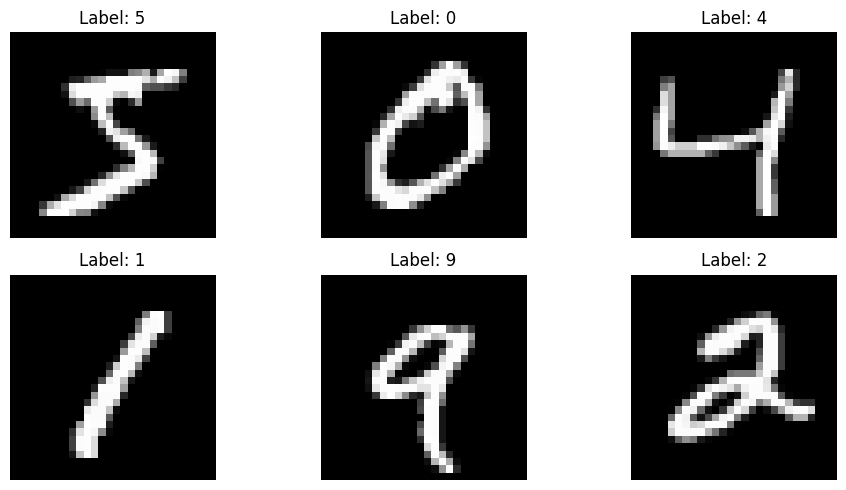

In [8]:
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")  # Fix: Convert one-hot label to digit
    plt.axis('off')
plt.tight_layout()
plt.show()

Define custom activation function: x * sigmoid(x)

In [9]:
def custom_activation(x):
    return x * tf.math.sigmoid(x)

Define the modified LeNet-5 architecture

In [10]:
model = models.Sequential([
    layers.Conv2D(6, (3, 3), activation=custom_activation, input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),  # Max pooling instead of avg pooling
    layers.Conv2D(16, (3, 3), activation=custom_activation),
    layers.MaxPooling2D((2, 2)),  # Max pooling
    layers.Flatten(),
    layers.Dense(256, activation=custom_activation),
    layers.Dense(10, activation='softmax')  # Softmax layer at the end
])

Print model summary

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,166 (414.71 KB)

 Trainable params: 106,166 (414.71 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model with categorical crossentropy and Adam optimizer

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [13]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8787 - loss: 0.4257 - val_accuracy: 0.9794 - val_loss: 0.0649
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9805 - loss: 0.0632 - val_accuracy: 0.9837 - val_loss: 0.0479
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9874 - loss: 0.0400 - val_accuracy: 0.9867 - val_loss: 0.0362
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9860 - val_loss: 0.0449
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 0.9883 - val_loss: 0.0346
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9876 - val_loss: 0.0386
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9966 - loss: 0.0

Evaluate the model

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0720
Test Accuracy: 0.9892


Pick a random image from the test set for prediction

In [15]:
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]

Expand dimensions to match model input shape

In [16]:
random_image_expanded = np.expand_dims(random_image, axis=0)

Display the selected image

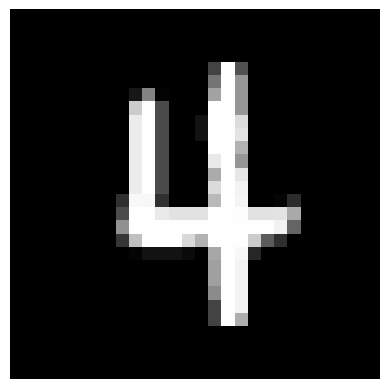

In [17]:
plt.imshow(random_image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

Predict the class

In [18]:
predictions = model.predict(random_image_expanded)
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Display the prediction

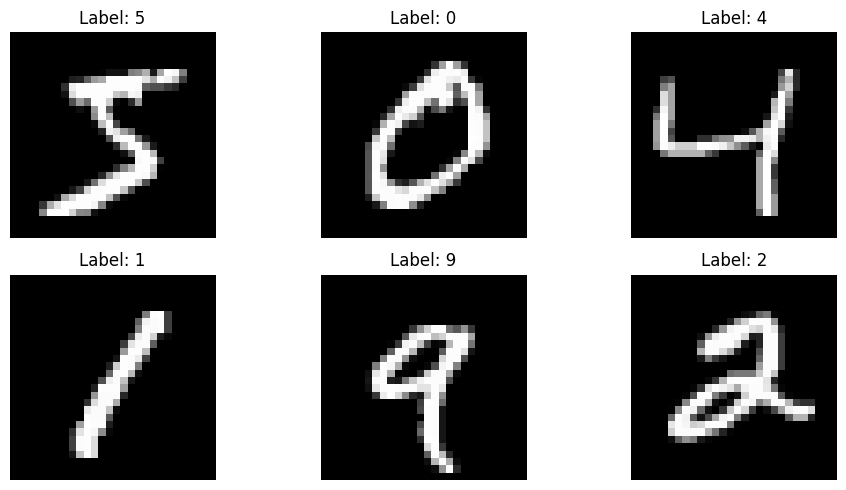

c:\Users\vaibh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,166 (414.71 KB)

 Trainable params: 106,166 (414.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8705 - loss: 0.4180 - val_accuracy: 0.9792 - val_loss: 0.0653
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9819 - val_loss: 0.0555
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9877 - val_loss: 0.0385
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.9879 - val_loss: 0.0379
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9896 - val_loss: 0.0389
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9973 - loss: 0

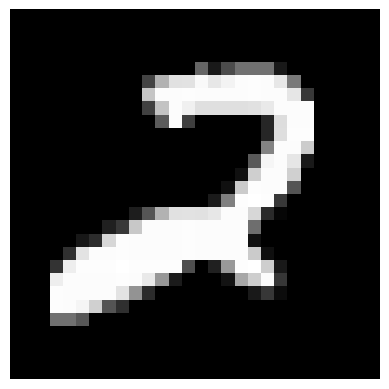

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Predicted Digit: 2


In [ ]:
print(f"Predicted Digit: {predicted_class}")